# LOGISTIC REGRESSION. 

This is a supervied machine learning algorithm that aims at predicting a category or class an entity belongs to. Logistic regression is a classification problem that can take two forms ; binomial/binary classification where there are two classes or multinomial/multiclass where outputs are three or more classes. While regression problems have continous variable outputs (unbounded) , classification analysis have discrete outcomes. 

Example of logistic regressions include : 
* Predicting whether an email is spam or not
* image recognition , determine whether an image is a dog or human
* predicting whether an employee will be promoted or not based on predioctors such as experience, education
* determining credit scores 
* predicting whether a patient has heat disease or not

The sigmoid function has values are either 1 or 0 or others very close to them, this property makes it suitable for use in logistic resression analysis problems. 

## Problem formulation. 
In this tutorial we will see how this algorith is used to predict heart disease (dependent variable, 𝑦ᵢ) given a set of predictor features (independent variables, 𝐱ᵢ) for observations 𝑖 = 1, ...., n. Like linear regression we start with a set of known values of predictors 𝐱ᵢ for corressponding value 𝑦ᵢ given observations 𝑖 = 1, .... , n. 

Our goal is to find a function p(x) such that predictor input p(x) is a s close as possible to actual values of 𝑦ᵢ in each observations in 𝑖. Expected values are values close to 0 or 1(actual responses). Assuming that the mathematicl dependence between training data and useen data is unchanged, the function will easily predict. 

Logistic regression is a linear classifier that uses a function called `logit` : 
                
                𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ₙ𝑥ₙ u

                𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱))
            
* 𝑏₀ , 𝑏₁ and  𝑏ᵣ are estimators of the regression coefficient, also called predicted weights.
* 𝑥₁ , 𝑥ₙ are predictor variables 
* 𝑝(𝐱) is the logistic function , which is the sigmoid function of 𝑓(𝐱)


This estimator optimises estimators/weights to ensure that predicted values are close to actual values using test dataset. This process is called model fitting. Once these values are found, a predicted value 𝑝(𝐱ᵢ) given an input 𝐱ᵢ can be determines easily. A threshold is set at 0.5 such that for each observation 𝑖, if value (𝑓(𝐱)) is 0.5 or greater predicted value is set to 1 ,else 0. Threshold is varied depending on use needs. So how do we end up with values 1 or 0, remember  𝑓(𝐱) is the logit function, where 𝑓(𝐱) = log(𝑝(𝐱) / (1 − 𝑝(𝐱))) . 

In [1]:
# Import modules 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [23]:
# Read datset 

data = pd.read_csv('C:/Users/Admin/Downloads/Heart.csv')

print(f'data sample : {data.head()} \n \
      data structure : {data.size} \n \
      data columns : {data.columns} \n \
      data shape {data.shape}')

data sample :    Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No   
       data structure : 4545 
       data columns : Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object') 
       d

## Explore and clean data 

In [24]:
# Find columns with missing values 
print(f'Missing data : {data.isnull().sum()}\n')

# Drop missing data 
new_data = data.dropna(axis=0, how='any')
print(f'\n Missing data : {new_data.isnull().sum()}')

Missing data : Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


 Missing data : Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64


In [25]:
# Drop unwanted columns 

new_data = new_data.drop(columns=['Unnamed: 0'])
new_data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [26]:
# Change categporical data to numeric data 

# Chestpains 
new_data.ChestPain = new_data.ChestPain.astype('category')
new_data.ChestPain = new_data.ChestPain.cat.codes

# ADH , ACQUIRED HEART DISEASE 
new_data.AHD = new_data.AHD.astype('category')
new_data.AHD = new_data.AHD.cat.codes

# Thal
new_data.Thal = new_data.Thal.astype('category')
new_data.Thal = new_data.Thal.cat.codes

# View data
print(f'Ushuffled data : \n {new_data}')



# Shuffle rows 
new_data = new_data.sample(frac=1, random_state=10)
new_data = new_data.reset_index(drop=True)

# shuffled data 
print(f'\n\n  Shiffled data : \n {new_data}')


Ushuffled data : 
      Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0     63    1          3     145   233    1        2    150      0      2.3   
1     67    1          0     160   286    0        2    108      1      1.5   
2     67    1          0     120   229    0        2    129      1      2.6   
3     37    1          1     130   250    0        0    187      0      3.5   
4     41    0          2     130   204    0        2    172      0      1.4   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
297   57    0          0     140   241    0        0    123      1      0.2   
298   45    1          3     110   264    0        0    132      0      1.2   
299   68    1          0     144   193    1        0    141      0      3.4   
300   57    1          0     130   131    0        0    115      1      1.2   
301   57    0          2     130   236    0        2    174      0      0.0   

     Slope   Ca  Thal  AHD  
0  

## Define trraining and test data.

We need to write a function that predicts whether a patient has heart disease in ADH column. All other features will be used as predictors, we start by spliting the data by randomly selecting 70% for training and remaining for test. 

In [27]:
# Define training features by creating feature variables 
X = new_data.drop(columns='AHD')
print(f'Training features : \n {X.head()}')

# Define labels 
y = new_data[['AHD']]
print(f'\n\n---------------------\n\n   Labels : \n {y.head()}')

Training features : 
    Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   60    1          0     130   206    0        2    132      1      2.4   
1   54    1          0     120   188    0        0    113      0      1.4   
2   71    0          1     110   265    1        2    130      0      0.0   
3   64    0          0     130   303    0        0    122      0      2.0   
4   56    1          2     130   221    0        2    163      0      0.0   

   Slope   Ca  Thal  
0      2  2.0     2  
1      2  1.0     2  
2      1  1.0     1  
3      2  2.0     1  
4      1  0.0     2  


---------------------

   Labels : 
    AHD
0    1
1    1
2    0
3    0
4    0


In [39]:
# Split the data into training(70%) and testing data(30%) ,pick random rows 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)

# Data features 
print(f'data shape : {(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)} \n ')

# View split data 
print(f'training data : \n {X_train} \n\n')

print(f'-----------------------\n test data : \n {X_test}')

data shape : (((237, 13), (237, 1)), ((60, 13), (60, 1))) 
 
training data : 
      Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
60    66    1          0     160   228    0        2    138      0      2.3   
37    54    0          1     108   267    0        2    167      0      0.0   
123   57    1          0     110   201    0        0    126      1      1.5   
156   62    1          0     120   267    0        0     99      1      1.8   
106   57    1          0     130   131    0        0    115      1      1.2   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
188   69    0          3     140   239    0        0    151      0      1.8   
120   59    0          0     174   249    0        0    143      1      0.0   
48    43    1          0     120   177    0        2    120      1      2.5   
260   68    1          0     144   193    1        0    141      0      3.4   
207   55    0          2     132   342    0        0

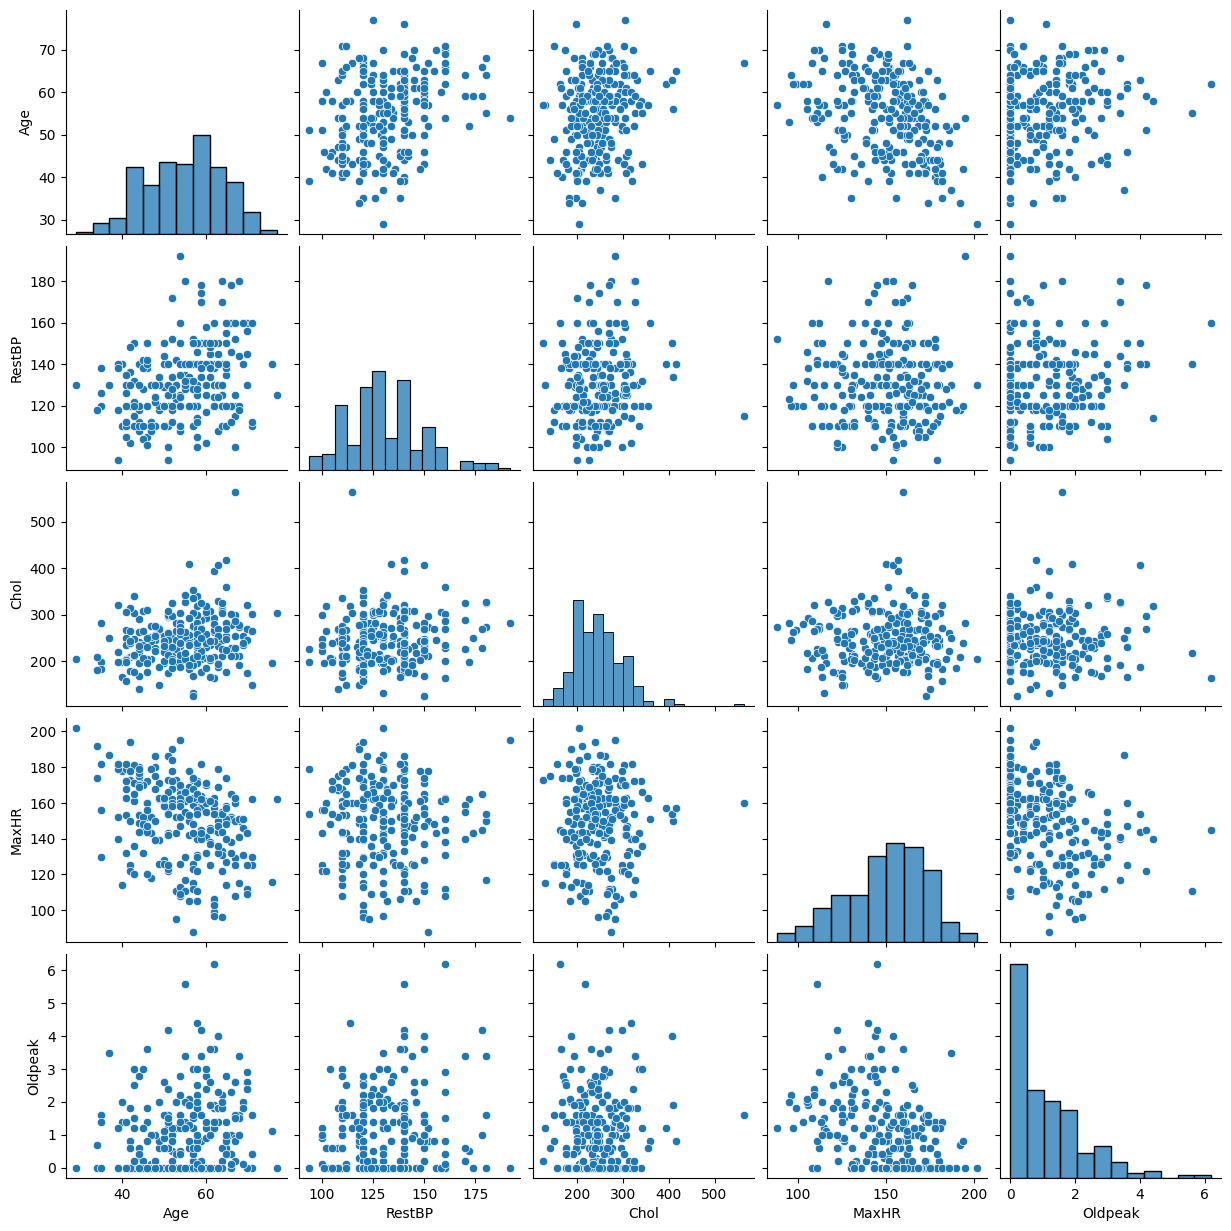

In [40]:
# View relationship between features in the dataframe using a pairwise plot. 

# Continous numerical variable 
attributes = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']

# Plot scatter plot
sns.pairplot(X_train[attributes])

In [41]:
# Distribution of labels , should have equall distribution 

new_data.AHD.value_counts()


AHD
0    160
1    137
Name: count, dtype: int64

<Axes: >

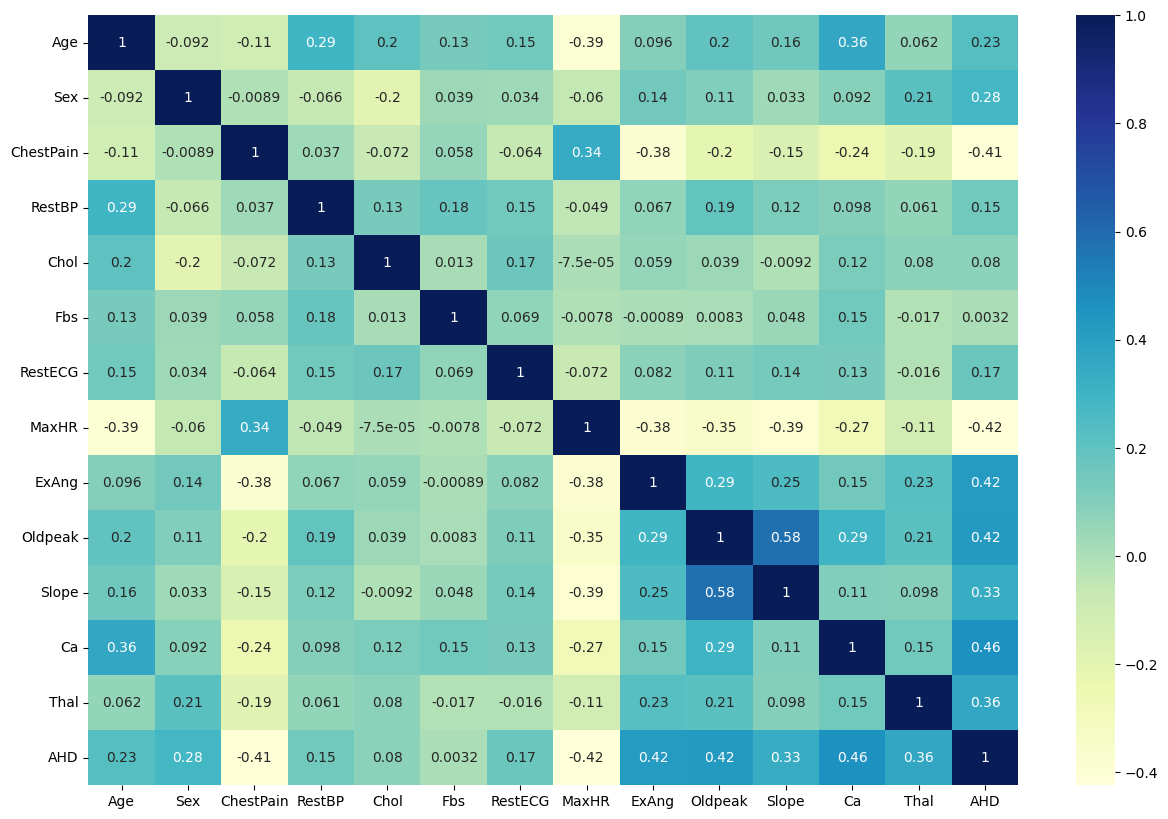

In [42]:
# Determine a correlation heatmap 

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(new_data.corr(), cmap="YlGnBu", annot=True)


### Scale the data.

Scalling is a critical pre-processing step that ensures all predictors are transformed to  a common scale. This ensure accurate training and improved performance of the model by reducing the biases and inconsistencies. Achieved trough normalising magnitude, distribution and range of data. This avoids a situation where a single feature has dominance over other in the algorithm performance by giving proportional weight effect. It also improves the speed of some algorithms during training as well as handling skewed data or outliers. There are two types of scalling techniques, normalisation and standardisation. We will use scikit learn algorithm that adopts the later which transforms features by subtracting the mean and dividing by its standard deviation. This method is mostly prefered because it maintains feature distribution by not bounding them to any specific range. 

x′ = (x - μ) / σ

 * **x′** - Scale data 
* **X** - observation 
* **μ** - mean 
* **σ** - standard deviation 

In [43]:
# Fit a scaler 

scaler = StandardScaler()

# Fit data to scaler, fit method learns the mean and variance(scaling parameters) of the data while transform 
# transforms all features using x′ 
X_train_scaled = scaler.fit_transform(X_train)

# also transfor the test data but do not fit because we do not want out model to be exposed to actual values that
# we will be predicting , just use the parameters learnt to transform
X_test_scaled = scaler.transform(X_test)

# Scaled data is transformed into 2 dimensional numpy array 
X_test_scaled


array([[-1.59720183e-01, -1.44149994e+00, -8.60303023e-01,
         3.83887140e-01, -2.43254824e-01, -3.80693494e-01,
         1.05651552e+00,  4.46740070e-01, -7.13830610e-01,
        -9.41146100e-01, -9.91245915e-01, -6.97082392e-01,
        -5.72478028e-01],
       [ 6.06105780e-01, -1.44149994e+00,  1.74680817e-01,
        -6.27015662e-01, -1.27307238e+00,  2.62678511e+00,
        -9.62792370e-01, -2.40038320e+00, -7.13830610e-01,
        -9.41146100e-01, -9.91245915e-01, -6.97082392e-01,
        -5.72478028e-01],
       [-5.03164737e-02,  6.93721846e-01, -8.60303023e-01,
        -5.14693128e-01,  7.13004332e-01, -3.80693494e-01,
         1.05651552e+00, -1.51065718e+00,  1.40089257e+00,
         1.82753195e+00,  6.28928443e-01,  1.44848289e+00,
        -5.72478028e-01],
       [ 2.77894653e-01,  6.93721846e-01,  1.20966466e+00,
         1.28246741e+00, -2.80034023e-01, -3.80693494e-01,
         1.05651552e+00,  6.24685275e-01, -7.13830610e-01,
        -9.41146100e-01, -9.91245915e

## Test model.


In [44]:
# Fit model. 

# Define model 
model = LogisticRegression()

# FIt model 
lg_reg = model.fit(X_train_scaled, y_train)

# Predict trained data 
pred_y = lg_reg.predict(X_train_scaled)

# Evaluate model performance on data it was trained on 
score = lg_reg.score(X_train_scaled, y_train)
print(f'\n Model variance that can be explained : {score} \n\n predicted values : {pred_y}')

# Preditions 
print(f'\n Value predictions : \n {pd.value_counts(pred_y)} \n')


 Model variance that can be explained : 0.8818565400843882 

 predicted values : [0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0
 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0
 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0]

 Value predictions : 
 0    140
1     97
Name: count, dtype: int64 



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5448\712401031.py:17: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(f'\n Value predictions : \n {pd.value_counts(pred_y)} \n')


A whoping 89% is just amazing but remember this is its own data trained on, thus this could be overfitting. 

In [45]:
# Predict test data 

pred_test_y = lg_reg.predict(X_test_scaled)

# Evaluate model performance on data it was NOT trained on 
score = lg_reg.score(X_test_scaled, y_test)
print(f'Model variance that can be explained : {score * 100}%')

Model variance that can be explained : 75.0%


Accuracy between test data and train data in 6% so we assume the model is quite good. 

Feature: 0, Score: -0.08328
Feature: 1, Score: 0.91924
Feature: 2, Score: -0.71692
Feature: 3, Score: 0.40372
Feature: 4, Score: 0.14960
Feature: 5, Score: -0.47370
Feature: 6, Score: 0.12264
Feature: 7, Score: -0.66903
Feature: 8, Score: 0.58398
Feature: 9, Score: 0.36331
Feature: 10, Score: 0.48714
Feature: 11, Score: 1.38942
Feature: 12, Score: 0.48269


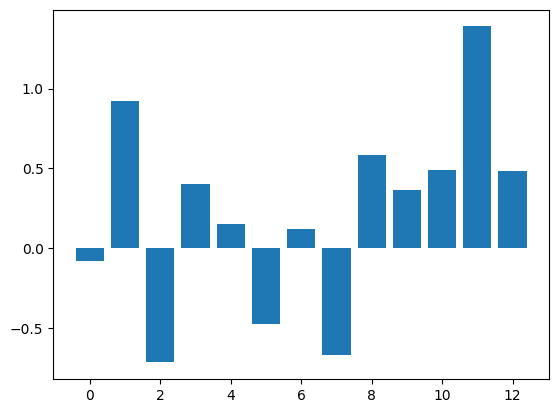

In [15]:
# get feature importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

## Improve model.

In [16]:
lg_reg2 = LogisticRegression(
                                C = 0.1,
                                fit_intercept = True,
                            ).fit(X_train_scaled, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# training data 
lg_reg2.score(X_train_scaled, y_train)

0.8840579710144928

In [18]:
# test data 
lg_reg2.score(X_test_scaled, y_test)


0.7888888888888889

No significant improvement. Try different c values , 0.03 , 0.1 and more. Default value is 1. 

## Model Metrics. 



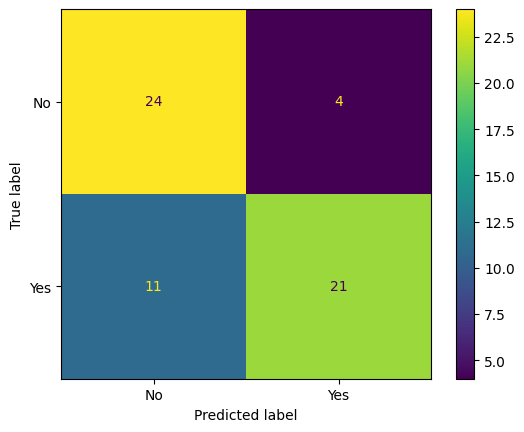

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

# Confusion matrix , pass observed values and predicted values too
cm = confusion_matrix(y_test, pred_test_y, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()
